In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:00<00:00, 44.7MB/s]
100% 2.29G/2.29G [01:00<00:00, 40.9MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("/content/chest-xray-pneumonia.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dense,MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.regularizers import l2

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/chest_xray/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 5216 files belonging to 2 classes.


In [ ]:
test_ds=keras.utils.image_dataset_from_directory(
    directory="/content/chest_xray/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 624 files belonging to 2 classes.


In [ ]:
from keras.layers import Dropout

In [ ]:
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(512,activation="relu",kernel_regularizer=l2(0.01)))
model.add(Dropout(0.05))
model.add(Dense(64,activation="relu",kernel_regularizer=l2(0.01)))
model.add(Dropout(0.05))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy","precision","recall"])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
callback=EarlyStopping(monitor="val_accuracy",restore_best_weights=True,patience=4)

In [ ]:
history=model.fit(train_ds,epochs=10,batch_size=32,validation_data=test_ds,callbacks=callback)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 276ms/step - accuracy: 0.9377 - loss: 0.4580 - precision: 0.9526 - recall: 0.9645 - val_accuracy: 0.8429 - val_loss: 0.5317 - val_precision: 0.8288 - val_recall: 0.9436
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 275ms/step - accuracy: 0.9465 - loss: 0.3101 - precision: 0.9611 - recall: 0.9678 - val_accuracy: 0.7628 - val_loss: 0.6346 - val_precision: 0.7309 - val_recall: 0.9821
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 264ms/step - accuracy: 0.9564 - loss: 0.2508 - precision: 0.9675 - recall: 0.9743 - val_accuracy: 0.8109 - val_loss: 0.5284 - val_precision: 0.7810 - val_recall: 0.9692
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 276ms/step - accuracy: 0.9555 - loss: 0.2146 - precision: 0.9683 - recall: 0.9723 - val_accuracy: 0.8109 - val_loss: 0.5461 - val_precision: 0.7822 - val_recall: 0.9667
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 262ms/step - accuracy: 0.9649 - loss: 0.1797 - precision: 0.9793 - recall: 0.9734 - val_accuracy: 0.7147

In [ ]:
plt.show(history.history["recall"])
plt.show(history.history["val_recall"])

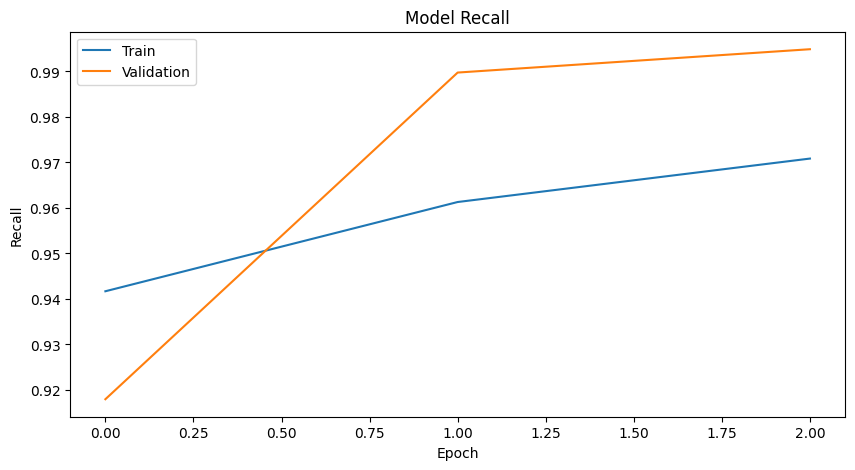

In [ ]:
# prompt: write code to test penumona_image

import matplotlib.pyplot as plt

# Assuming 'history' is the variable holding the training history from model.fit
# If not, replace 'history' with the actual variable name

# Plot training & validation recall values
plt.figure(figsize=(10, 5))
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step


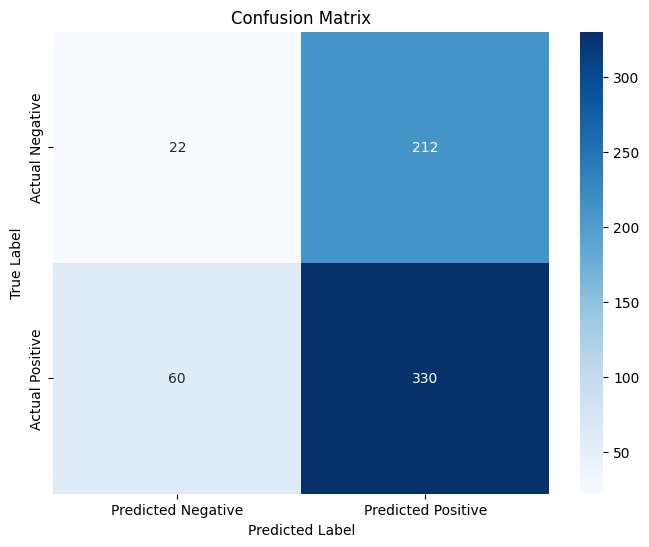

In [ ]:
# prompt: write code for classifiaction matrix

from sklearn.metrics import confusion_matrix


# Assuming 'model' and 'test_ds' are defined as in the previous code

# Get predictions on the test set
y_pred = model.predict(test_ds)
y_pred_classes = (y_pred > 0.5).astype(int) # Convert probabilities to class labels (0 or 1)

# Extract true labels from test_ds
y_true = []
for images, labels in test_ds:
    y_true.extend(labels.numpy())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()